<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-n-dimensional-Ackley-Function" data-toc-modified-id="The-n-dimensional-Ackley-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The n-dimensional Ackley Function</a></span></li><li><span><a href="#GA-for-n-dimensional-Ackley-Function" data-toc-modified-id="GA-for-n-dimensional-Ackley-Function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GA for n-dimensional Ackley-Function</a></span><ul class="toc-item"><li><span><a href="#Plotting-for-Special-Case-N=2" data-toc-modified-id="Plotting-for-Special-Case-N=2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting for Special Case N=2</a></span></li><li><span><a href="#Encoding-of-Genetic-Information" data-toc-modified-id="Encoding-of-Genetic-Information-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Encoding of Genetic Information</a></span></li><li><span><a href="#Initial-Population" data-toc-modified-id="Initial-Population-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Initial Population</a></span></li><li><span><a href="#Selection" data-toc-modified-id="Selection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Selection</a></span></li><li><span><a href="#Crossover" data-toc-modified-id="Crossover-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Crossover</a></span></li><li><span><a href="#Mutation" data-toc-modified-id="Mutation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Mutation</a></span></li><li><span><a href="#GA-Algorithm" data-toc-modified-id="GA-Algorithm-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>GA Algorithm</a></span></li></ul></li><li><span><a href="#Ant-Colony-Optimisation" data-toc-modified-id="Ant-Colony-Optimisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ant Colony Optimisation</a></span><ul class="toc-item"><li><span><a href="#Pherome-Table" data-toc-modified-id="Pherome-Table-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pherome Table</a></span></li><li><span><a href="#The-ACO-Algorithm" data-toc-modified-id="The-ACO-Algorithm-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The ACO Algorithm</a></span></li></ul></li></ul></div>

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
import random

# The n-dimensional Ackley Function

We use for this example the following specific parameters: the dimension N = 2..100 and the range of the domain R. For the visualisation part we use N==2. 

The n-dimensional [Ackley function](https://en.wikipedia.org/wiki/Ackley_function) 
$e+20-20e^{-0.2\sqrt{\sum_{i=1}^{n}\frac{x_i^2}{n}}}-e^{\sum_{i=1}^{n}\frac{\cos 2\pi x_i}{n}}$
was proposed in 1987 by David Ackley in his 
[PhD Thesis](https://link.springer.com/book/10.1007%2F978-1-4613-1997-9). It is a typical test function for optimization problems with a global minimum of 0 at $(0,\ldots ,0)$:

In [7]:
π=math.pi
def f(X):
    N = len(X)
    return 20+np.e- \
            20*np.exp(-0.2*np.sqrt(np.sum([ x*x for x in X ])/N))- \
            np.exp(sum([np.cos(2*π*x) for x in X])/N)

Checking the known solution:

In [8]:
f([0 for i in range(100)])

-4.440892098500626e-16

# GA for n-dimensional Ackley-Function

## Plotting for Special Case N=2

In [9]:
def plotPopulation(R, N, population=[], title=None):
    if N>2:
        return
    
    def a(x,y):
        return 20+np.e- \
                20*np.exp(-0.2*np.sqrt((x**2+y**2)/2))- \
                np.exp((np.cos(2*π*x)+np.cos(2*π*y))/2)

    xs = np.linspace(-R, R, 200)
    ys = np.linspace(-R, R, 200) 
    xx, yy = np.meshgrid(xs, ys) 
    z=a(xx, yy)
    fig, ax = plt.subplots(1, 1) 
    fig.set_figwidth(6) 
    fig.set_figheight(5)
    
    if not title is None:
        fig.suptitle(title)
    cs = ax.contourf(xs, ys, z, 100) 
    fig.colorbar(cs, ax=ax)
    
    x =[ p[0][0] for p in population]
    y =[ p[0][1] for p in population]
    plt.plot(x, y, 'r.')

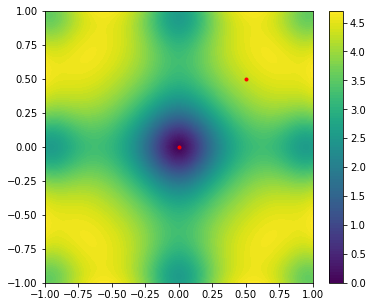

In [10]:
plotPopulation(1, 2, population=[([0,0],0),([0.5,0.5],1)])

## Encoding of Genetic Information

We use an n-dimensional continous GA. 

In [11]:
def chromosome(x):
    return x[0]

def fitness(x):
    return x[1]

def incarnation(X):
    return (X, f(X))

## Initial Population

In [12]:
def initialPopulation(R, N, n):
    
    def gen(R, N):
        x = [ random.uniform(-R,R) for i in range(N) ]
        return incarnation(x)

    return [ gen(R, N) for i in range(n) ]

## Selection

Selection for mating is a random process that yields two parents from the current population. Parents are selected with a probability that is proportional to the normalised fitness.

In [13]:
def selectParents(population):
    ff = [ fitness(p) for p in population ]
    upb=math.ceil(max(ff))
    posf = [ (upb-f)**2 for f in ff ]
    A, B = random.choices(population, weights=posf, k=2)
    if A==B:
        [A, B] = random.sample(population, 2)
    return (A, B)

## Crossover

In [14]:
def crossover(a,b):
    assert(len(a)==len(b))
    pos=random.randint(0, len(a))
    return (a[0:pos]+b[pos:], b[0:pos]+a[pos:])

## Mutation

In [15]:
def mutate(R, N, X, p):
    
    def m(n, b):
        b = b.copy()
        positions = random.sample(range(N), n)
        for i in positions:
            b[i] = min(R, max(-R, stats.norm.rvs(loc=b[i], scale=0.1)))
        return b

    u = random.random()
    if u<=p:
        return m(random.randint(1,N-1), X)
    else:
        return X

## GA Algorithm

In [16]:
def GA(R, N, 
       size=100, 
       mutationRate=0.01, 
       generations=20, 
       log=True,
       plot=True):
    population = initialPopulation(R, N, size)
    minimum = math.inf
    for gen in range(generations+1):
        if log and fitness(population[-1])<minimum:
            minimum = fitness(population[-1])
            print(f"Generation: {gen:3d} min: {minimum:7.4f}")
        if plot and gen%(generations//10)==0:
            plotPopulation(R, N,
                 population=population, 
                 title=f"Generation {gen:3d} min= {minimum:7.4f}")
        A, B = selectParents(population)
        X, Y = crossover(chromosome(A), chromosome(B))
        C = incarnation(mutate(R, N, X, mutationRate))
        D = incarnation(mutate(R, N, Y, mutationRate))
 
        population=sorted(population+[C,D], key=lambda x:fitness(x), reverse=True)[2:]
    return population[-1]

In [17]:
random.seed(0)
x, fx = GA(10, 100, generations=500, mutationRate=0.9, log=True, plot=True)
fx

Generation:   0 min: 15.3928
Generation:   1 min: 14.7076
Generation:   4 min: 14.6111
Generation:   5 min: 14.5231
Generation:  12 min: 14.4424
Generation:  43 min: 14.4403
Generation:  49 min: 14.2993
Generation:  63 min: 14.1770
Generation:  75 min: 14.1581
Generation:  78 min: 14.0465
Generation:  82 min: 13.8606
Generation:  89 min: 13.6965
Generation: 148 min: 13.6721
Generation: 151 min: 13.5912
Generation: 170 min: 13.5230
Generation: 178 min: 13.4319
Generation: 182 min: 13.1418
Generation: 221 min: 13.0755
Generation: 224 min: 12.9909
Generation: 232 min: 12.9810
Generation: 266 min: 12.9159
Generation: 285 min: 12.8001
Generation: 293 min: 12.7791
Generation: 342 min: 12.7515
Generation: 344 min: 12.6873
Generation: 416 min: 12.6612
Generation: 424 min: 12.6308
Generation: 428 min: 12.6130
Generation: 447 min: 12.5925
Generation: 450 min: 12.5348
Generation: 465 min: 12.4808
Generation: 486 min: 12.4505


12.450501448394267

# Ant Colony Optimisation

The domain $R^N$ is discretised in each dimention into $n$ intervals, so that we consider in total $n^N$ blocks. The resolution of the blocks is $2R/n$.

## Pherome Table

The Pheromone table `τ[i][j]` describes quality of solutions found by ants in dimension `i` inside the block `j`.
Everytime an ant visits a point inside the block `j`, the the amount of pheromones for the block is incremented.

In [18]:
def solution(τ, B):
    
    def value(i):
        maxidx = -1
        maxval = -math.inf
        t = τ[i]
        for j in range(len(t)):
            if t[j]>maxval:
                maxval, maxidx = t[j], j
        # maxidx is now the index of the largest
        # value in 
        return (B[maxidx]+B[maxidx+1])/2
        # return random.uniform(B[maxidx], B[maxidx+1])
    
    x = [ value(i) for i in range(N) ]
    return (x, f(x))

In [19]:
def solution_str(τ, B):
    
    def interval(i):
        maxidx = -1
        maxval = -math.inf
        t = τ[i]
        for j in range(len(t)):
            if t[j]>maxval:
                maxval, maxidx = t[j], j
        # maxidx is now the index of the largest
        # value in 
        return B[maxidx], B[maxidx+1]
        # return random.uniform(B[maxidx], B[maxidx+1])
    
    # print(τ)
    
    res = ""
    x = []
    for i in range(N):
        a, b = interval(i)
        x += [ (a+b)/2 ]
        res+= f"{x[-1]:7.6f} "
    return res + f" -> {f(x): 7.5f}"

There are utilities to print out small pherometables (suitable for up to 10 nodes) and to display the pherome table (suitable to up to 100 nodes).

In [20]:
def printPheromones(t):
    for tt in t:
        print("[", end='')
        n = len(tt)
        for j in range(n):
            if j>0:
                print("|", end='')
            print(f"{tt[j]:4.3f}", end='')
        print("]")

In [21]:
def plotPheromones(R, N, B, t, population=[], title=None, style='ro', ms=5):

    if N>2:
        return
    
    def a(x,y):
        return 20+np.e- \
                20*np.exp(-0.2*np.sqrt((x**2+y**2)/2))- \
                np.exp((np.cos(2*π*x)+np.cos(2*π*y))/2)

    xs = np.linspace(-R, R, 200)
    ys = np.linspace(-R, R, 200) 
    xx, yy = np.meshgrid(xs, ys) 
    z=a(xx, yy)
    fig, ax = plt.subplots(1, 1) 
    fig.set_figwidth(6) 
    fig.set_figheight(5)
    
    if not title is None:
        fig.suptitle(title)
    cs = ax.contourf(xs, ys, z, 100) 
    fig.colorbar(cs, ax=ax)
    
    for b in B:
        ax.axvline(x=b, c='gray', lw=0.5)
        ax.axhline(y=b, c='gray', lw=0.5)
        
    x =[ p[0][0] for p in population]
    y =[ p[0][1] for p in population]
    plt.plot(x, y, 'r.')

## The ACO Algorithm

In [22]:
def ACO(R, N, resolution=100, ants=100, generations=10, log=False, plot=False):
    
    n = resolution
    B = np.linspace(-R, R, n+1)

    def discretize(x):
        return [ math.floor(n*(xi+R)/(2*R)) for xi in x ]

    𝜶 = 1
    τ0 = 0.000001
    M = 4
    τ = [ [ τ0 for j in range(n) ] for i in range(N) ]
    ρ = 0.9
    
    for gen in range(generations):
        
        AF = [ ]
        
        for k in range(ants):
            
            # generate new position for ant
            ant = [ 0 for i in range(N) ]
            for i in range(N):
        
                s = 0
                for j in range(n):
                    s += τ[i][j]**𝜶
                    
                p = [ τ[i][j]**𝜶/s for j in range(n) ]
                
                cp = 0
                u = random.random()
                for j in range(n):
                    cp += p[j]
                    if u<=cp:
                        ant[i]=random.uniform(B[j], B[j+1])
                        break
                   
            AF.append((ant, f(ant)))
                     
        # pick the M best ants             
        AF = sorted(AF, key=lambda a: a[1])
 
        if plot and gen%(generations//10)==0:
            plotPheromones(R, N, B, τ, AF, title=f"Generation: {gen:d}")
            
        AF = AF[0:M]
            
        Δτ = [ [ 0 for j in range(n) ] for i in range(N) ]
    
        for af in AF:
            d = discretize(af[0])
            for i in range(N):
                Δτ[i][d[i]] += 1/af[1]
        
        for i in range(N):
            for j in range(n):
                τ[i][j] = (1-ρ)*τ[i][j] + Δτ[i][j]
                         
        if log and gen%5==0:
            print(f"Generation: {gen:d} "
                  f"solution: {solution_str(τ, B):s}")
            # printPheromones(τ)

    print(f"Stop after {gen:d} Generations")
            
    return solution(τ,B)

Generation: 0 solution: 0.854271 0.954774  ->  3.84113
Generation: 5 solution: -0.301508 -0.251256  ->  2.94849
Stop after 9 Generations


2.9484916313489413

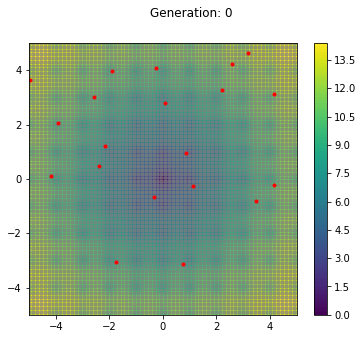

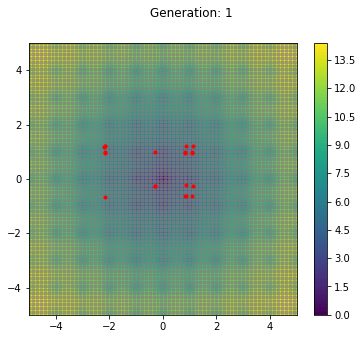

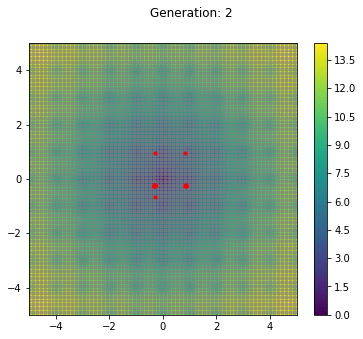

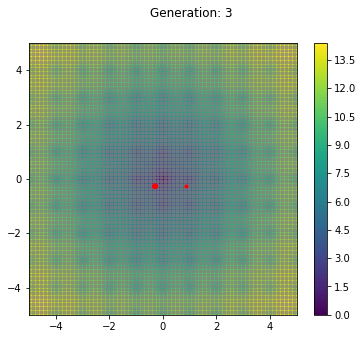

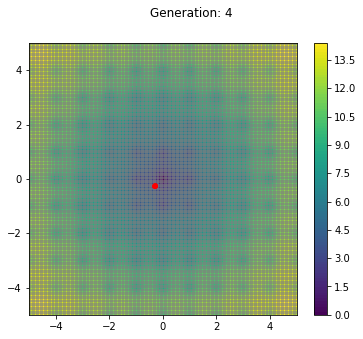

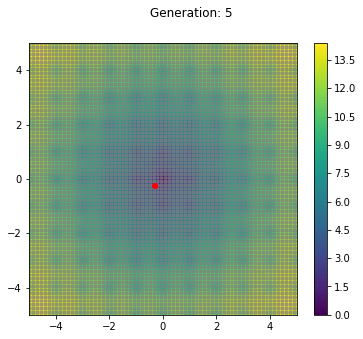

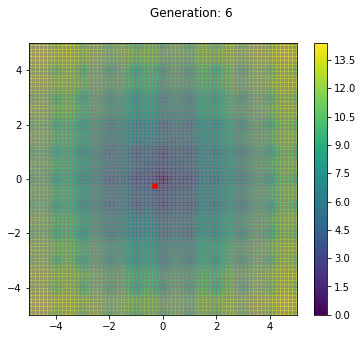

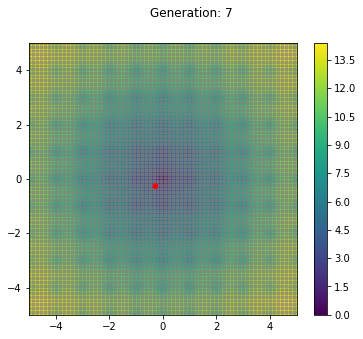

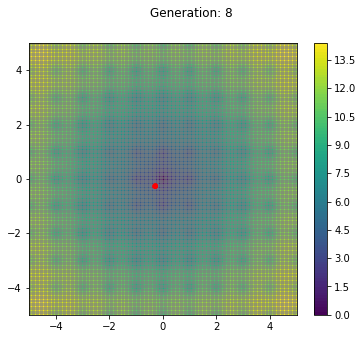

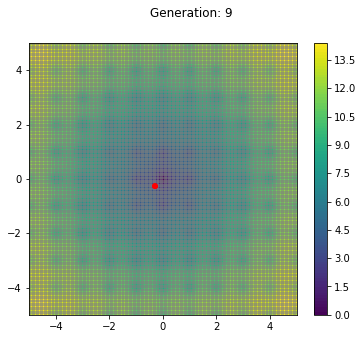

In [23]:
random.seed(0)
R = 5
N = 2
x, fx = ACO(R, N, resolution=199, ants=20, generations=10, 
         log=True, plot=True)
fx